<h1>Automatic Identification of Lithology using Machine Learning Approach</h1>

**Team 4 (Ahmed H. Gowida, Mahmoud H. Desouky, Abdullah M. Alqubalee)**

<i>Email Addresses:
AHG: g201708730@kfupm.edu.sa
MHD: g201706310@kfupm.edu.sa
AMA: g201304210@kfupm.edu.sa<i>




**Part one : Exploratory Data Analysis**

In [1]:
#import the dataset and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

col_names= ['SitID', 'Depth','LithID', 'W_Tar', 'SW', 'VSH', 'PHI', 'RW']
dataset = pd.read_csv('INTELLOG.txt',delimiter="\t", names= col_names)

#unique values of each variable
dataset.nunique()

SitID      2175
Depth     57186
LithID        7
W_Tar       505
SW          962
VSH        1001
PHI         437
RW         4925
dtype: int64

In [2]:
# unique wells and shape of the dataset
dataset.SitID.nunique(), dataset.shape

(2175, (579846, 8))

In [3]:
# this is the legend of the lithology
lithology = pd.read_csv('Lithology_dic.TXT',delimiter="\t")
lithology

,LithID,Description
0,0,Undefined
1,1,Sand
2,2,ShalySand
3,3,SandyShale
4,4,Shale
5,5,Coal
6,6,CementedSand


In [4]:
# select the list of wells to work on
import lasio
import os

las_file_list = []

# View contents of the path, we will see LAS files plus an ASCII file
files = os.listdir('Logs/')

#how many las files do we have?
len(files)

# get files based on a condition
for file in files:
    #choose las files of wells from the same region
    #we have identifier for each region, ex. North>>(T 91-104 ,R 5-21W4)
    if '5W5' in file:
        las_file_list.append(file)

#remove the well with incomplete data
las_file_list.remove('00-04-12-072-05W5-0.LAS')
las_file_list

['00-01-01-073-05W5-0.LAS',
 '00-02-01-074-05W5-0.LAS',
 '00-02-26-073-05W5-0.LAS',
 '00-03-19-081-05W5-0.LAS',
 '00-04-21-074-05W5-0.LAS',
 '00-05-18-071-05W5-0.LAS',
 '00-05-20-070-05W5-0.LAS',
 '00-06-06-075-05W5-0.LAS',
 '00-08-16-075-05W5-0.LAS',
 '00-09-27-072-05W5-0.LAS',
 '00-10-03-072-05W5-0.LAS',
 '00-10-22-071-05W5-0.LAS',
 '00-11-05-070-05W5-0.LAS',
 '00-11-10-070-05W5-0.LAS',
 '00-11-12-080-05W5-0.LAS',
 '00-11-23-070-05W5-0.LAS',
 '00-11-31-078-05W5-0.LAS',
 '00-11-32-077-05W5-0.LAS',
 '00-11-34-074-05W5-0.LAS',
 '00-12-08-074-05W5-0.LAS',
 '00-12-20-073-05W5-0.LAS',
 '00-13-07-075-05W5-0.LAS',
 '00-16-12-071-05W5-0.LAS',
 '00-16-29-073-05W5-0.LAS']

In [5]:
#how the data in the las file looks like
las = lasio.read('Logs/00-01-01-073-05W5-0.LAS')
lasdf = las.df()
lasdf

,DPHI,NPHI,GR,CALI,ILD
DEPT,,,,,
390.00,0.199,0.457,82.478,238.379,2.923
390.25,0.208,0.456,86.413,238.331,2.925
390.50,0.246,0.452,90.229,238.069,2.917
390.75,0.266,0.475,90.944,238.752,2.898
391.00,0.287,0.484,88.866,239.724,2.890
...,...,...,...,...,...
649.00,0.007,0.098,41.662,264.141,16.559
649.25,0.017,0.111,46.210,264.697,15.834
649.50,0.023,0.126,51.129,265.467,14.449


In [6]:
#we need to get the corrsponding SitID as this is the primary key with which we will join tables
wells= pd.read_csv('WELLS.txt',delimiter="\t")
wells['UWI'] = wells.UWI.str.replace('/', '-')+'.LAS'
selected = wells[wells['UWI'].isin(las_file_list)]
selected

,SitID,UWI (AGS),UWI
274,105983,0705050511000,00-11-05-070-05W5-0.LAS
275,105984,0705051011000,00-11-10-070-05W5-0.LAS
276,105987,0705052005000,00-05-20-070-05W5-0.LAS
277,105989,0705052311000,00-11-23-070-05W5-0.LAS
386,106838,0715051216000,00-16-12-071-05W5-0.LAS
387,106840,0715051805000,00-05-18-071-05W5-0.LAS
388,106841,0715052210000,00-10-22-071-05W5-0.LAS
492,107554,0725050310000,00-10-03-072-05W5-0.LAS
494,142140,0725052709000,00-09-27-072-05W5-0.LAS
598,142218,0735050101000,00-01-01-073-05W5-0.LAS


In [7]:
# generate dataframes from these las, 
# a fxn to import las files and 
df_list = []
for lasfile in las_file_list:
    las = lasio.read('Logs/'+lasfile)
    lasdf = las.df()
    lasdf['UWI']= lasfile
    lasdf['Depth']= lasdf.index
    df_list.append(lasdf)
    
#concatenate the dfs
las_data = pd.concat(df_list)
las_data

,DPHI,NPHI,GR,CALI,ILD,UWI,Depth,DELT
DEPT,,,,,,,,
390.00,0.199,0.457,82.478,238.379,2.923,00-01-01-073-05W5-0.LAS,390.00,NaN
390.25,0.208,0.456,86.413,238.331,2.925,00-01-01-073-05W5-0.LAS,390.25,NaN
390.50,0.246,0.452,90.229,238.069,2.917,00-01-01-073-05W5-0.LAS,390.50,NaN
390.75,0.266,0.475,90.944,238.752,2.898,00-01-01-073-05W5-0.LAS,390.75,NaN
391.00,0.287,0.484,88.866,239.724,2.890,00-01-01-073-05W5-0.LAS,391.00,NaN
...,...,...,...,...,...,...,...,...
594.00,0.196,0.350,68.563,296.143,9.052,00-16-29-073-05W5-0.LAS,594.00,NaN
594.25,0.177,0.307,65.013,292.079,9.488,00-16-29-073-05W5-0.LAS,594.25,NaN
594.50,0.160,0.280,67.554,290.617,9.599,00-16-29-073-05W5-0.LAS,594.50,NaN


In [8]:
las_data_SitID = pd.merge(las_data, selected, on= 'UWI')
las_data_SitID

,DPHI,NPHI,GR,CALI,ILD,UWI,Depth,DELT,SitID,UWI (AGS)
0,0.199,0.457,82.478,238.379,2.923,00-01-01-073-05W5-0.LAS,390.00,NaN,142218,0735050101000
1,0.208,0.456,86.413,238.331,2.925,00-01-01-073-05W5-0.LAS,390.25,NaN,142218,0735050101000
2,0.246,0.452,90.229,238.069,2.917,00-01-01-073-05W5-0.LAS,390.50,NaN,142218,0735050101000
3,0.266,0.475,90.944,238.752,2.898,00-01-01-073-05W5-0.LAS,390.75,NaN,142218,0735050101000
4,0.287,0.484,88.866,239.724,2.890,00-01-01-073-05W5-0.LAS,391.00,NaN,142218,0735050101000
...,...,...,...,...,...,...,...,...,...,...
21822,0.196,0.350,68.563,296.143,9.052,00-16-29-073-05W5-0.LAS,594.00,NaN,108306,0735052916000
21823,0.177,0.307,65.013,292.079,9.488,00-16-29-073-05W5-0.LAS,594.25,NaN,108306,0735052916000
21824,0.160,0.280,67.554,290.617,9.599,00-16-29-073-05W5-0.LAS,594.50,NaN,108306,0735052916000
21825,0.170,0.270,67.177,290.717,9.510,00-16-29-073-05W5-0.LAS,594.75,NaN,108306,0735052916000


In [10]:
data = pd.merge(dataset,las_data_SitID, on= ['Depth', 'SitID'])
data

,SitID,Depth,LithID,W_Tar,SW,VSH,PHI,RW,DPHI,NPHI,GR,CALI,ILD,UWI,DELT,UWI (AGS)
0,105983,885.04,5,0.0,1.0,0.736,0.100,5.2900,0.154,0.335,110.213,162.599,4.319,00-11-05-070-05W5-0.LAS,NaN,0705050511000
1,105983,885.29,5,0.0,1.0,0.736,0.100,5.2890,0.137,0.322,110.184,163.408,4.218,00-11-05-070-05W5-0.LAS,NaN,0705050511000
2,105983,885.54,5,0.0,1.0,0.787,0.081,5.2880,0.142,0.323,114.000,163.756,4.053,00-11-05-070-05W5-0.LAS,NaN,0705050511000
3,105983,885.79,5,0.0,1.0,0.826,0.066,5.2870,0.153,0.328,116.945,164.671,4.032,00-11-05-070-05W5-0.LAS,NaN,0705050511000
4,105983,886.04,5,0.0,1.0,0.831,0.064,5.2870,0.158,0.336,117.291,165.690,4.087,00-11-05-070-05W5-0.LAS,NaN,0705050511000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,178277,921.00,1,-1.0,1.0,0.059,0.200,0.3490,0.165,0.152,52.968,NaN,4.878,00-08-16-075-05W5-0.LAS,NaN,0755051608000
3784,178277,921.25,4,0.0,1.0,0.000,0.103,0.3490,0.018,0.129,45.830,NaN,11.520,00-08-16-075-05W5-0.LAS,NaN,0755051608000
3785,178277,921.50,4,0.0,1.0,0.000,0.081,0.3490,-0.014,0.122,41.074,NaN,15.810,00-08-16-075-05W5-0.LAS,NaN,0755051608000
3786,178277,921.75,4,0.0,1.0,0.000,0.100,0.3490,0.014,0.135,30.389,NaN,17.003,00-08-16-075-05W5-0.LAS,NaN,0755051608000


In [11]:
data.drop(labels= ['UWI', 'UWI (AGS)'], axis=1, inplace= True)
data

,SitID,Depth,LithID,W_Tar,SW,VSH,PHI,RW,DPHI,NPHI,GR,CALI,ILD,DELT
0,105983,885.04,5,0.0,1.0,0.736,0.100,5.2900,0.154,0.335,110.213,162.599,4.319,NaN
1,105983,885.29,5,0.0,1.0,0.736,0.100,5.2890,0.137,0.322,110.184,163.408,4.218,NaN
2,105983,885.54,5,0.0,1.0,0.787,0.081,5.2880,0.142,0.323,114.000,163.756,4.053,NaN
3,105983,885.79,5,0.0,1.0,0.826,0.066,5.2870,0.153,0.328,116.945,164.671,4.032,NaN
4,105983,886.04,5,0.0,1.0,0.831,0.064,5.2870,0.158,0.336,117.291,165.690,4.087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,178277,921.00,1,-1.0,1.0,0.059,0.200,0.3490,0.165,0.152,52.968,NaN,4.878,NaN
3784,178277,921.25,4,0.0,1.0,0.000,0.103,0.3490,0.018,0.129,45.830,NaN,11.520,NaN
3785,178277,921.50,4,0.0,1.0,0.000,0.081,0.3490,-0.014,0.122,41.074,NaN,15.810,NaN
3786,178277,921.75,4,0.0,1.0,0.000,0.100,0.3490,0.014,0.135,30.389,NaN,17.003,NaN


In [ ]:
#remove leading spaces
#data.RW.str.strip(' ')

#transform objects into float
#data['RW'] = data['RW'].str.extract(r'(\d+.\d+)').astype('float')
#data.RW.unique()

In [ ]:
#drop the null values in the data
#data.dropna(inplace=True)

In [12]:
data

,SitID,Depth,LithID,W_Tar,SW,VSH,PHI,RW,DPHI,NPHI,GR,CALI,ILD,DELT
0,105983,885.04,5,0.0,1.0,0.736,0.100,5.2900,0.154,0.335,110.213,162.599,4.319,NaN
1,105983,885.29,5,0.0,1.0,0.736,0.100,5.2890,0.137,0.322,110.184,163.408,4.218,NaN
2,105983,885.54,5,0.0,1.0,0.787,0.081,5.2880,0.142,0.323,114.000,163.756,4.053,NaN
3,105983,885.79,5,0.0,1.0,0.826,0.066,5.2870,0.153,0.328,116.945,164.671,4.032,NaN
4,105983,886.04,5,0.0,1.0,0.831,0.064,5.2870,0.158,0.336,117.291,165.690,4.087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,178277,921.00,1,-1.0,1.0,0.059,0.200,0.3490,0.165,0.152,52.968,NaN,4.878,NaN
3784,178277,921.25,4,0.0,1.0,0.000,0.103,0.3490,0.018,0.129,45.830,NaN,11.520,NaN
3785,178277,921.50,4,0.0,1.0,0.000,0.081,0.3490,-0.014,0.122,41.074,NaN,15.810,NaN
3786,178277,921.75,4,0.0,1.0,0.000,0.100,0.3490,0.014,0.135,30.389,NaN,17.003,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3788 entries, 0 to 3787
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SitID   3788 non-null   int64  
 1   Depth   3788 non-null   float64
 2   LithID  3788 non-null   int64  
 3   W_Tar   3788 non-null   float64
 4   SW      3788 non-null   float64
 5   VSH     3788 non-null   float64
 6   PHI     3788 non-null   float64
 7   RW      3788 non-null   object 
 8   DPHI    3360 non-null   float64
 9   NPHI    3360 non-null   float64
 10  GR      3788 non-null   float64
 11  CALI    3271 non-null   float64
 12  ILD     3788 non-null   float64
 13  DELT    428 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 443.9+ KB


In [14]:
descriptive= data[['SW', 'VSH', 'PHI', 'GR', 'RW', 'CALI']].describe()
descriptive

,SW,VSH,PHI,GR,CALI
count,3788.000000,3788.000000,3788.000000,3788.000000,3271.000000
mean,0.972421,0.605947,0.117557,81.140609,233.426619
std,0.100328,0.262702,0.074535,25.198171,77.158161
min,0.248000,0.000000,0.000000,14.827000,130.031000
25%,1.000000,0.451000,0.065000,67.409500,163.348000
50%,1.000000,0.648000,0.111000,82.230000,217.386000
75%,1.000000,0.803000,0.163250,95.477500,282.613000
max,1.000000,1.000000,0.380000,287.487000,574.481000


In [15]:
selected_data = data[['VSH', 'PHI', 'RW', 'GR', 'CALI']]
selected_data

,VSH,PHI,RW,GR,CALI
0,0.736,0.100,5.2900,110.213,162.599
1,0.736,0.100,5.2890,110.184,163.408
2,0.787,0.081,5.2880,114.000,163.756
3,0.826,0.066,5.2870,116.945,164.671
4,0.831,0.064,5.2870,117.291,165.690
...,...,...,...,...,...
3783,0.059,0.200,0.3490,52.968,NaN
3784,0.000,0.103,0.3490,45.830,NaN
3785,0.000,0.081,0.3490,41.074,NaN
3786,0.000,0.100,0.3490,30.389,NaN


In [16]:
descriptive2 = selected_data.describe()
descriptive2

,VSH,PHI,GR,CALI
count,3788.000000,3788.000000,3788.000000,3271.000000
mean,0.605947,0.117557,81.140609,233.426619
std,0.262702,0.074535,25.198171,77.158161
min,0.000000,0.000000,14.827000,130.031000
25%,0.451000,0.065000,67.409500,163.348000
50%,0.648000,0.111000,82.230000,217.386000
75%,0.803000,0.163250,95.477500,282.613000
max,1.000000,0.380000,287.487000,574.481000


In [ ]:
descriptive.to_csv('descriptive.csv')
descriptive2.to_csv('descriptive2.csv')

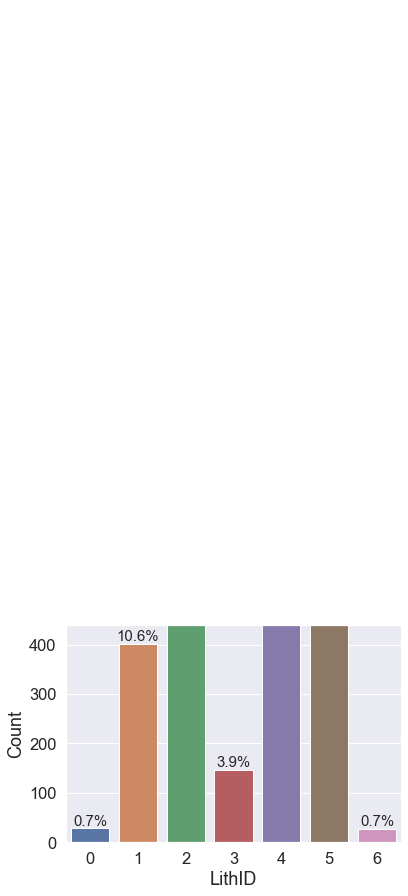

In [17]:
plt.figure()
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.5)
ax= sns.countplot(x="LithID", data=data)
ax.set(ylabel='Count')
plt.ylim([0, 440])
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), size=15,
            ha='center', va='bottom') # set the alignment of the text
plt.savefig('Lithology.png')

In [18]:
data['LithID'].value_counts()/data.shape[0]*100

5    43.875396
4    27.745512
2    12.486800
1    10.586061
3     3.854277
0     0.739176
6     0.712777
Name: LithID, dtype: float64

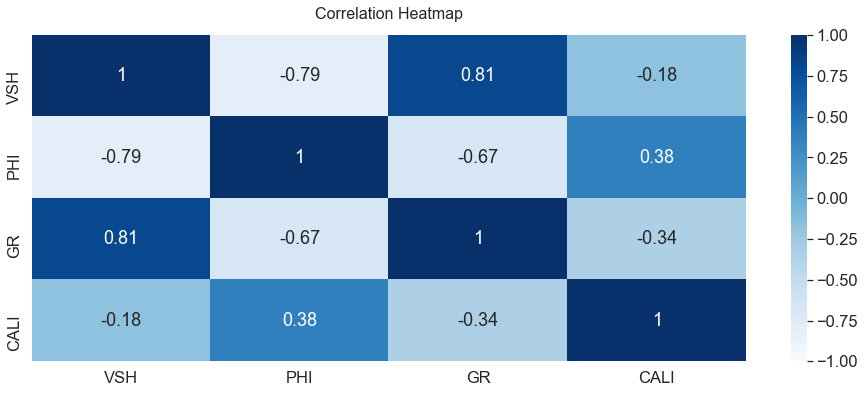

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data[['VSH', 'PHI', 'GR', 'RW', 'CALI']].corr(), vmin=-1, vmax=1, annot=True, cmap= 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16);
plt.savefig('CC.png')

In [ ]:
import seaborn as sns
data.LithID = data.LithID.astype('category')
sns.pairplot(data, vars= ['VSH', 'PHI', 'GR', 'RW', 'CALI'], hue='LithID', palette = 'CMRmap')
plt.savefig('pair.png')

In [ ]:
sns.pairplot(data, vars= ['VSH', 'PHI', 'GR', 'RW', 'CALI'], palette = 'CMRmap')

In [ ]:
# the name of the file
file_name = 'CompiledData.xlsx'
  
# saving the excel
data.to_csv(file_name)

In [ ]:
from platform import python_version

print(python_version())

In [ ]:
!jupyter --version